In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import stellargraph as sg
import graphnets
from graphnets import gcn_pipeline, graphsage_pipeline

In [2]:
network = pd.read_csv('data/bio-pathways-network.csv')
graph = nx.from_pandas_edgelist(network, 'Gene ID 1', 'Gene ID 2')

In [3]:
multi_diseases = pd.read_csv('data/simple-single-all-proteins.csv', index_col=0)
binary_diseases = pd.read_csv('data/binary-classes.csv', index_col=0)
multi_only_diseases = pd.read_csv('data/simple-single-diseased-proteins.csv', index_col=0)

In [4]:
three_orbitals_exact = pd.read_csv('motifs location/result3.csv', index_col=0)
three_orbitals = pd.read_csv('motifs location/subsampling_3.csv', index_col=1).drop('Unnamed: 0', axis=1)
four_orbitals = pd.read_csv('motifs location/subsampling_4.csv', index_col=1).drop('Unnamed: 0', axis=1)

In [5]:
nodes = set(graph.nodes())
drop_rows = []
for n in multi_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
node_multi_diseases = multi_diseases.drop(drop_rows)

In [6]:
dis_graph = nx.read_gml('networks/diseased-ppi')
dis_graph = nx.relabel_nodes(dis_graph, lambda x: int(x), copy=False)
nodes = set(dis_graph.nodes())
drop_rows = []
for n in multi_only_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
dis_nodes_multi = multi_only_diseases.drop(drop_rows)

In [7]:
motif3_exact_multi_only_diseases = dis_nodes_multi.join(three_orbitals_exact)
motif3_exact_multi_diseases = pd.concat([node_multi_diseases,three_orbitals_exact], axis=1)

motif3_multi_only_diseases = dis_nodes_multi.join(three_orbitals)
motif3_multi_diseases = pd.concat([node_multi_diseases,three_orbitals], axis=1)

motif4_multi_only_diseases = dis_nodes_multi.join(four_orbitals)
motif4_multi_diseases = pd.concat([node_multi_diseases,four_orbitals], axis=1)

In [8]:
np.random.seed(1)
node_multi_diseases = node_multi_diseases.assign(dummy=np.random.uniform(0,1, size=len(node_multi_diseases)))
baseline = node_multi_diseases['dummy']
drop_rows = []
for n in baseline.index:
    if n not in nodes:
        drop_rows.append(n)
dis_baseline = baseline.drop(drop_rows)

**Original**

Full Network

In [9]:
# G = sg.StellarGraph(graph, node_features=node_multi_diseases)
G = sg.StellarGraph(graph, node_features=baseline)

<ipython-input-9-eeb5d5c9cab9>:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G = sg.StellarGraph(graph, node_features=baseline)


Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 1.7434 - acc: 0.7863 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.7434

acc: 0.7863

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


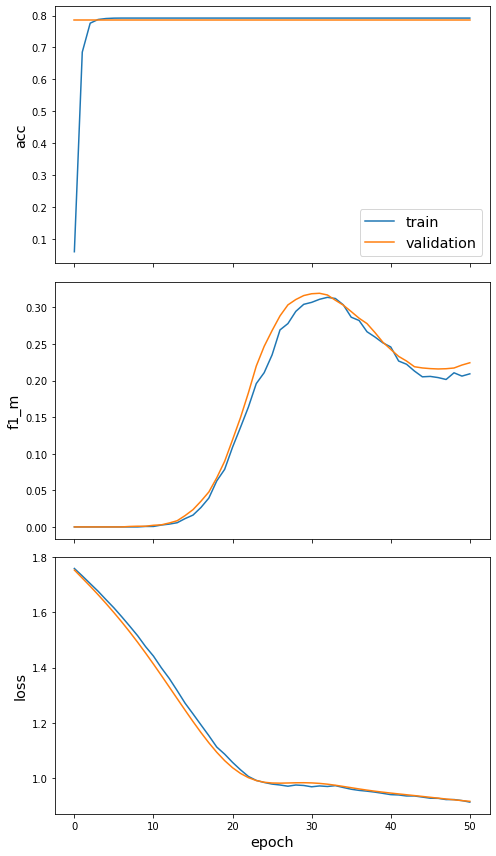

In [10]:
gcn_pipeline(G, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Training...
173/173 [==============================] - 3s 18ms/step - loss: 0.8716 - acc: 0.7923 - f1_m: 0.1854 - precision_m: 0.1595 - recall_m: 0.2235

Test Set Metrics:

loss: 0.8716

acc: 0.7923

f1_m: 0.1854

precision_m: 0.1595

recall_m: 0.2235


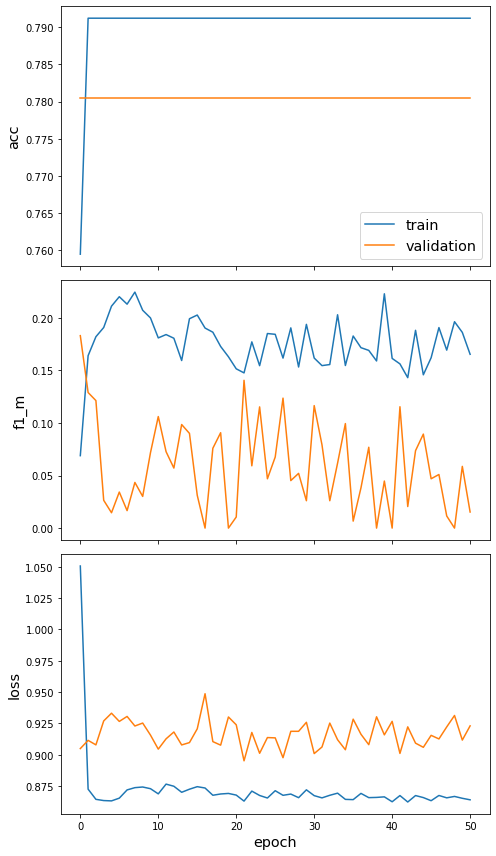

In [11]:
graphsage_pipeline(G, node_multi_diseases)

Diseased Network

In [12]:
dG = sg.StellarGraph(dis_graph, node_features=dis_baseline)

<ipython-input-12-f14fbb15d480>:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG = sg.StellarGraph(dis_graph, node_features=dis_baseline)


Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 1.6481 - acc: 0.3002 - f1_m: 0.0210 - precision_m: 0.4872 - recall_m: 0.0107

Test Set Metrics:

loss: 1.6481

acc: 0.3002

f1_m: 0.0210

precision_m: 0.4872

recall_m: 0.0107


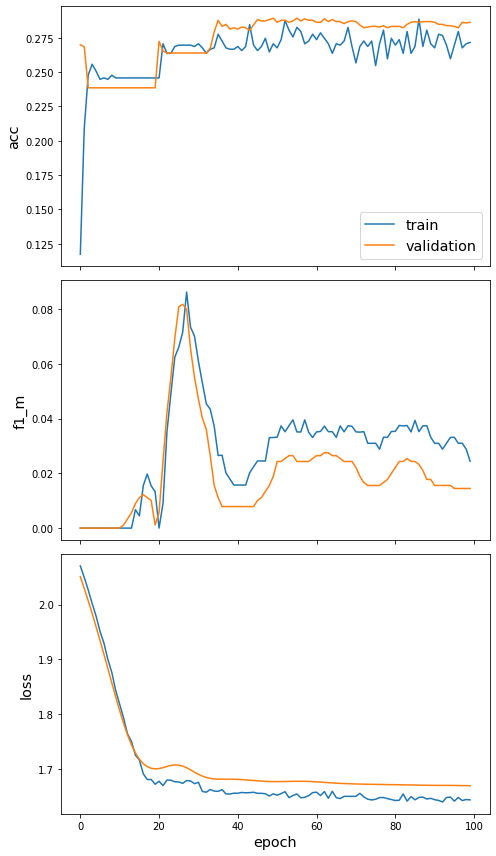

In [13]:
gcn_pipeline(dG, dis_nodes_multi, layer_sizes=[32,32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 17ms/step - loss: 1.7425 - acc: 0.2704 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.7425

acc: 0.2704

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


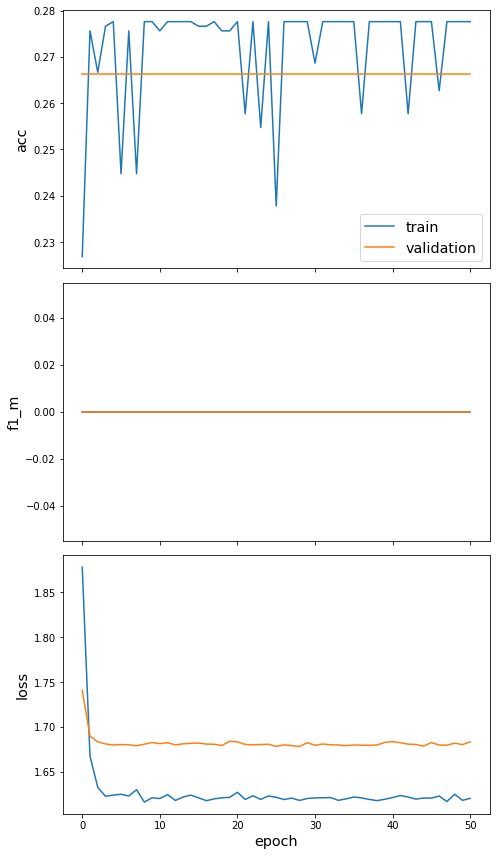

In [14]:
graphsage_pipeline(dG, dis_nodes_multi)

**3-graphlet**

*Exact*

Full Network

In [15]:
# G_motif3_exact = sg.StellarGraph(graph, node_features=motif3_exact_multi_diseases)
# G_motif3_exact.info()
G_motif3_exact = sg.StellarGraph(graph, node_features=three_orbitals_exact)
G_motif3_exact.info()

<ipython-input-15-3d915d5b1720>:3: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif3_exact = sg.StellarGraph(graph, node_features=three_orbitals_exact)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 5\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 3.4379 - acc: 0.7864 - f1_m: 0.5919 - precision_m: 0.5105 - recall_m: 0.7041

Test Set Metrics:

loss: 3.4379

acc: 0.7864

f1_m: 0.5919

precision_m: 0.5105

recall_m: 0.7041


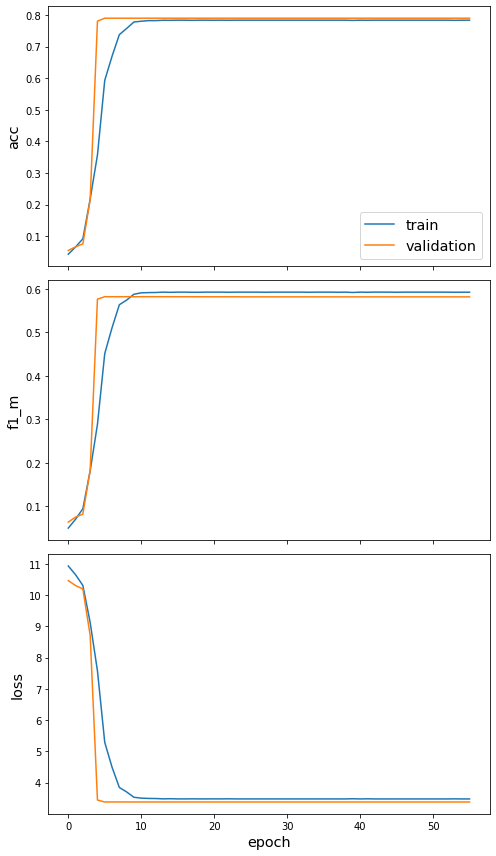

In [16]:
gcn_pipeline(G_motif3_exact, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Training...
173/173 [==============================] - 3s 18ms/step - loss: 0.8869 - acc: 0.7881 - f1_m: 0.1614 - precision_m: 0.1401 - recall_m: 0.1921

Test Set Metrics:

loss: 0.8869

acc: 0.7881

f1_m: 0.1614

precision_m: 0.1401

recall_m: 0.1921


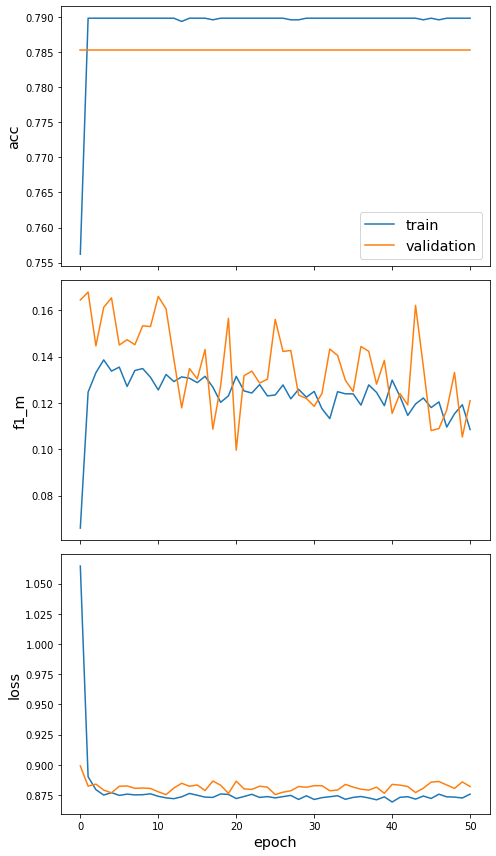

In [17]:
graphsage_pipeline(G_motif3_exact, node_multi_diseases)

Diseased Network

In [18]:
# dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=motif3_exact_multi_only_diseases)
drop_rows = []
for n in three_orbitals_exact.index:
    if n not in nodes:
        drop_rows.append(n)
dis_three_orbitals = three_orbitals_exact.drop(drop_rows)
dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)
dG_motif3_exact.info()

<ipython-input-18-c4ade1e85c22>:7: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif3_exact = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 5\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 9.8479 - acc: 0.2694 - f1_m: 0.2865 - precision_m: 0.2697 - recall_m: 0.3055

Test Set Metrics:

loss: 9.8479

acc: 0.2694

f1_m: 0.2865

precision_m: 0.2697

recall_m: 0.3055


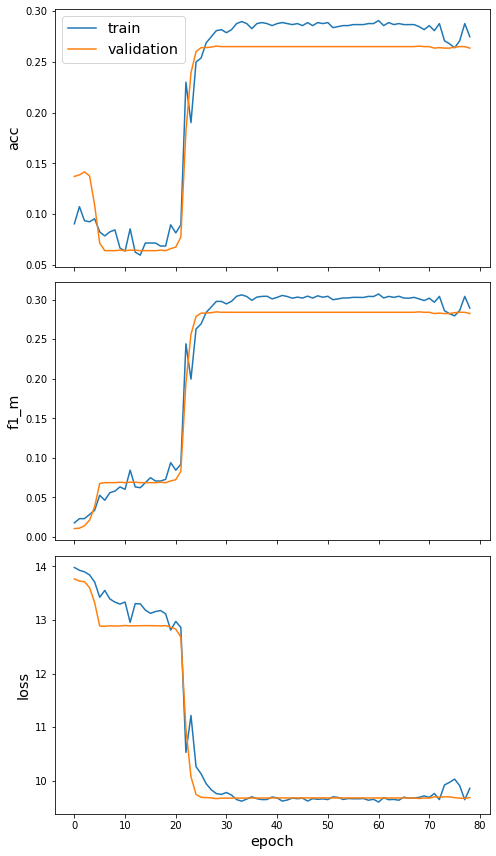

In [19]:
gcn_pipeline(dG_motif3_exact, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 21ms/step - loss: 1.6300 - acc: 0.2873 - f1_m: 0.0011 - precision_m: 0.0244 - recall_m: 5.5432e-04

Test Set Metrics:

loss: 1.6300

acc: 0.2873

f1_m: 0.0011

precision_m: 0.0244

recall_m: 0.0006


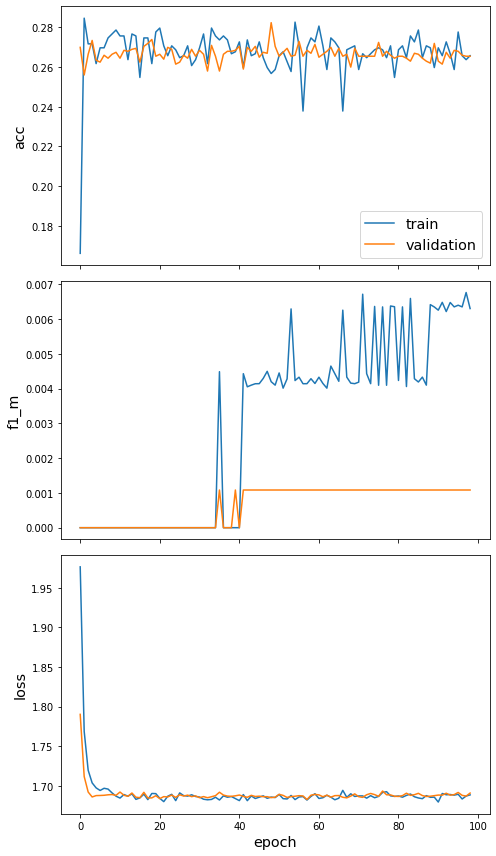

In [20]:
graphsage_pipeline(dG_motif3_exact, dis_nodes_multi)

*Subsampled*

Full Network

In [21]:
# G_motif3_subsampled = sg.StellarGraph(graph, node_features=motif3_multi_diseases)
G_motif3_subsampled = sg.StellarGraph(graph, node_features=three_orbitals)
G_motif3_subsampled.info()

<ipython-input-21-e82b418406a0>:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif3_subsampled = sg.StellarGraph(graph, node_features=three_orbitals)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 3\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 3.4974 - acc: 0.7831 - f1_m: 0.5870 - precision_m: 0.5091 - recall_m: 0.6932

Test Set Metrics:

loss: 3.4974

acc: 0.7831

f1_m: 0.5870

precision_m: 0.5091

recall_m: 0.6932


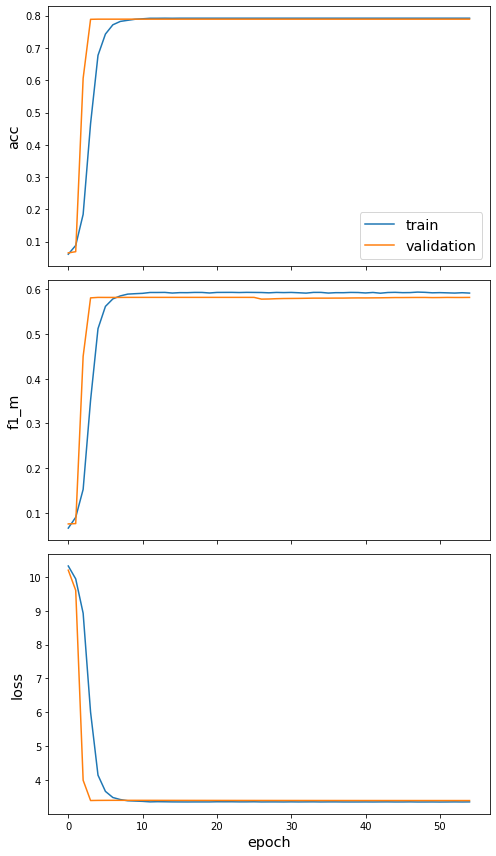

In [22]:
gcn_pipeline(G_motif3_subsampled, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Training...
173/173 [==============================] - 4s 22ms/step - loss: 0.8885 - acc: 0.7863 - f1_m: 0.1856 - precision_m: 0.1605 - recall_m: 0.2222

Test Set Metrics:

loss: 0.8885

acc: 0.7863

f1_m: 0.1856

precision_m: 0.1605

recall_m: 0.2222


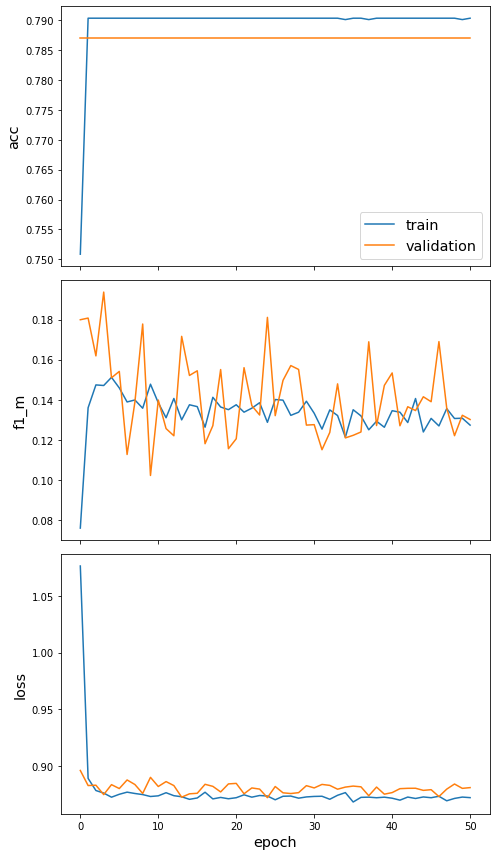

In [23]:
graphsage_pipeline(G_motif3_subsampled, node_multi_diseases)

Diseased Network

In [24]:
# dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=motif3_multi_only_diseases)
drop_rows = []
for n in three_orbitals.index:
    if n not in nodes:
        drop_rows.append(n)
dis_three_orbitals = three_orbitals.drop(drop_rows)
dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)
dG_motif3_subsampled.info()

<ipython-input-24-2038d2b5cfd0>:7: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif3_subsampled = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 3\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 9.9328 - acc: 0.2570 - f1_m: 0.2743 - precision_m: 0.2577 - recall_m: 0.2933

Test Set Metrics:

loss: 9.9328

acc: 0.2570

f1_m: 0.2743

precision_m: 0.2577

recall_m: 0.2933


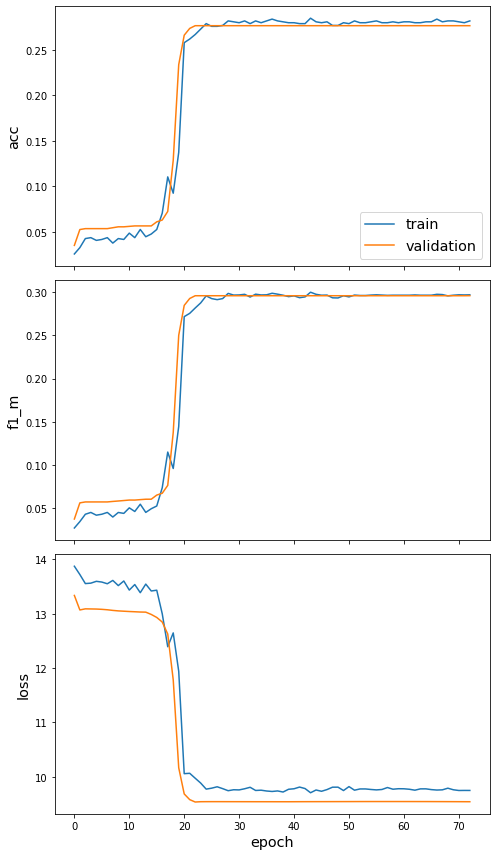

In [25]:
gcn_pipeline(dG_motif3_subsampled, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 21ms/step - loss: 1.6919 - acc: 0.2510 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.6919

acc: 0.2510

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


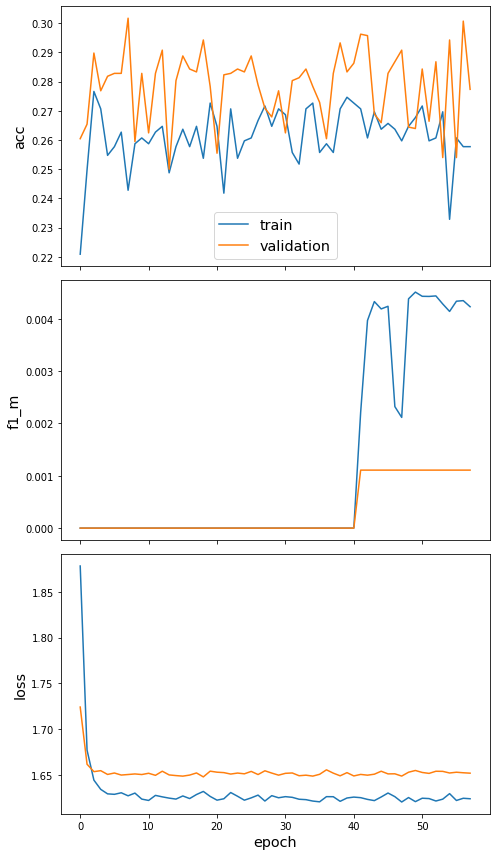

In [26]:
graphsage_pipeline(dG_motif3_subsampled, dis_nodes_multi)

**4-graphlet**

Full Network

In [27]:
# G_motif4 = sg.StellarGraph(graph, node_features=motif4_multi_diseases)
G_motif4 = sg.StellarGraph(graph, node_features=four_orbitals)
G_motif4.info()

<ipython-input-27-e65cdb4fd242>:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif4 = sg.StellarGraph(graph, node_features=four_orbitals)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 11\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 3.3707 - acc: 0.7903 - f1_m: 0.5867 - precision_m: 0.5029 - recall_m: 0.7040

Test Set Metrics:

loss: 3.3707

acc: 0.7903

f1_m: 0.5867

precision_m: 0.5029

recall_m: 0.7040


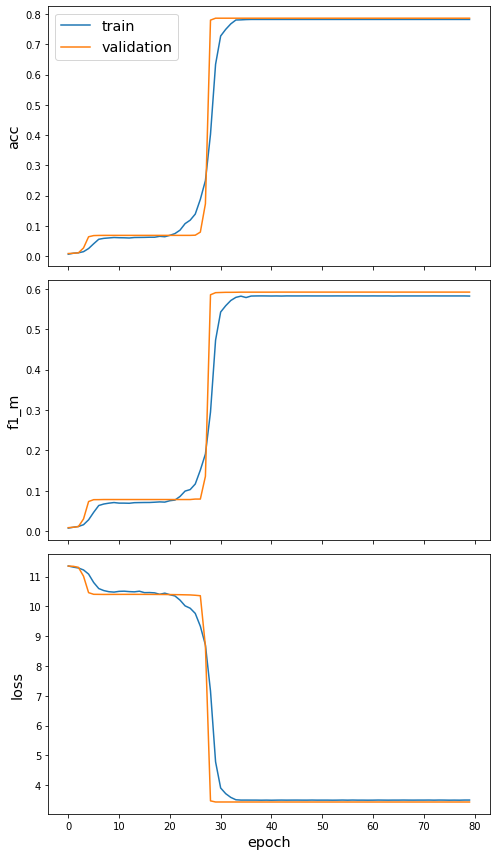

In [28]:
gcn_pipeline(G_motif4, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Training...
173/173 [==============================] - 4s 21ms/step - loss: 0.8908 - acc: 0.7867 - f1_m: 0.1539 - precision_m: 0.1340 - recall_m: 0.1827

Test Set Metrics:

loss: 0.8908

acc: 0.7867

f1_m: 0.1539

precision_m: 0.1340

recall_m: 0.1827


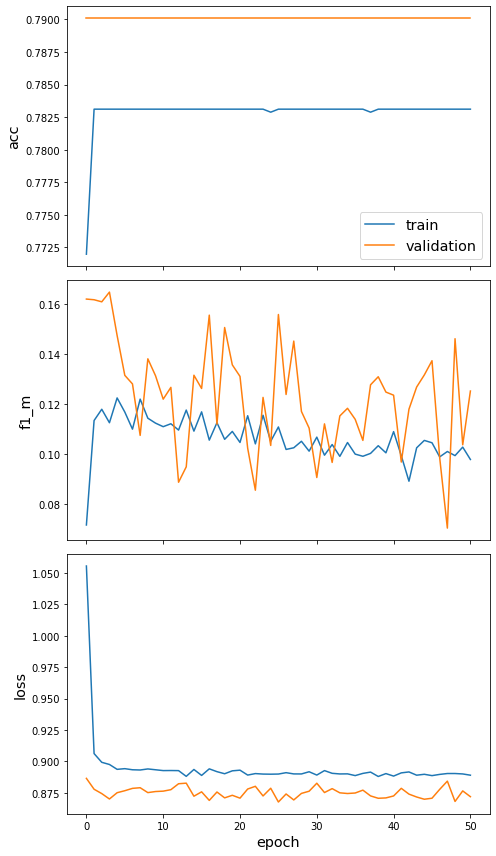

In [29]:
graphsage_pipeline(G_motif4, node_multi_diseases)

Diseased Network

In [30]:
# dG_motif4 = sg.StellarGraph(dis_graph, node_features=motif4_multi_only_diseases)
drop_rows = []
for n in four_orbitals.index:
    if n not in nodes:
        drop_rows.append(n)
dis_three_orbitals = four_orbitals.drop(drop_rows)
dG_motif4 = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)
dG_motif4.info()

<ipython-input-30-bb1ad28b2fb2>:7: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif4 = sg.StellarGraph(dis_graph, node_features=dis_three_orbitals)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 11\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 10.0756 - acc: 0.2500 - f1_m: 0.2662 - precision_m: 0.2501 - recall_m: 0.2844

Test Set Metrics:

loss: 10.0756

acc: 0.2500

f1_m: 0.2662

precision_m: 0.2501

recall_m: 0.2844


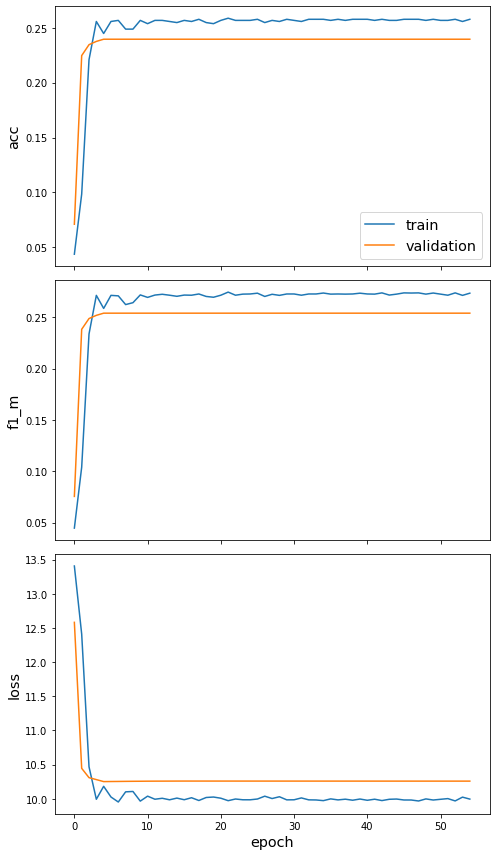

In [31]:
gcn_pipeline(dG_motif4, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 23ms/step - loss: 1.6633 - acc: 0.2798 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.6633

acc: 0.2798

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


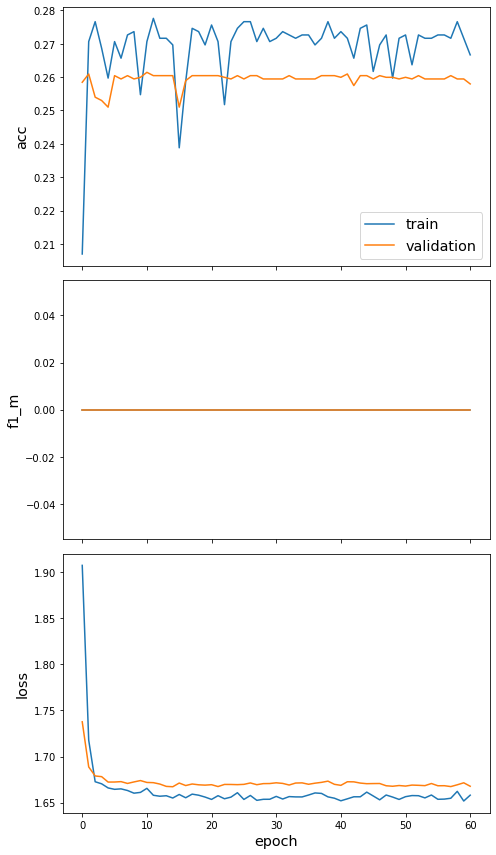

In [32]:
graphsage_pipeline(dG_motif4, dis_nodes_multi)

**Provided Orbitals**

In [33]:
motifs = pd.read_csv('data/bio-pathways-proteinmotifs.csv', index_col=0)

In [34]:
all_motifs_multi_only_diseases = dis_nodes_multi.join(motifs)
all_motifs_multi_diseases = node_multi_diseases.join(motifs)

In [43]:
motif = all_motifs_multi_diseases[motifs.columns]
dis_motif = all_motifs_multi_only_diseases[motifs.columns]

In [44]:
# G_motif_exact = sg.StellarGraph(graph, node_features=all_motifs_multi_diseases)
G_motif_exact = sg.StellarGraph(graph, node_features=motif)
G_motif_exact.info()

<ipython-input-44-9232d2c81978>:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  G_motif_exact = sg.StellarGraph(graph, node_features=motif)


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 73\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

In [45]:
# dG_motif_exact = sg.StellarGraph(dis_graph, node_features=all_motifs_multi_only_diseases)
dG_motif_exact = sg.StellarGraph(dis_graph, node_features=dis_motif)
dG_motif_exact.info()

<ipython-input-45-820438fdadfe>:2: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  dG_motif_exact = sg.StellarGraph(dis_graph, node_features=dis_motif)


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 73\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Full Network

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 3.3650 - acc: 0.7910 - f1_m: 0.5974 - precision_m: 0.5153 - recall_m: 0.7106

Test Set Metrics:

loss: 3.3650

acc: 0.7910

f1_m: 0.5974

precision_m: 0.5153

recall_m: 0.7106


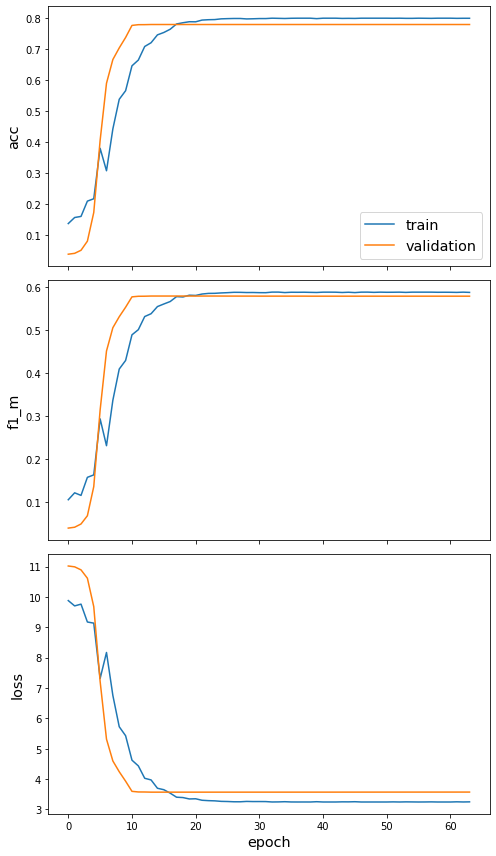

In [46]:
gcn_pipeline(G_motif_exact, node_multi_diseases)

Array shapes:
 train = (4311, 12)
 val = (8623, 12)
 test = (8623, 12)
Training...
173/173 [==============================] - 3s 19ms/step - loss: 0.9217 - acc: 0.7769 - f1_m: 0.1599 - precision_m: 0.1397 - recall_m: 0.1887

Test Set Metrics:

loss: 0.9217

acc: 0.7769

f1_m: 0.1599

precision_m: 0.1397

recall_m: 0.1887


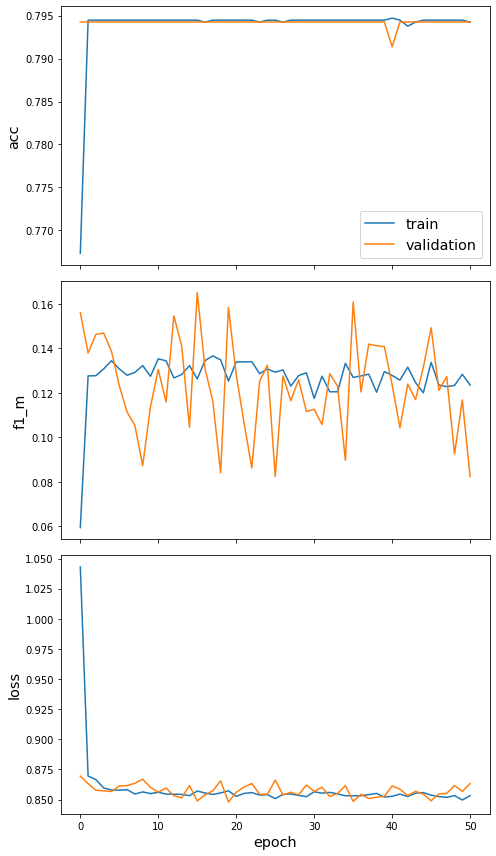

In [47]:
graphsage_pipeline(G_motif_exact, node_multi_diseases)

Diseased Network

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Using GCN (local pooling) filters...
Training...
1/1 [==============================] - 0s 2ms/step - loss: 13.1987 - acc: 0.0567 - f1_m: 0.0599 - precision_m: 0.0563 - recall_m: 0.0641

Test Set Metrics:

loss: 13.1987

acc: 0.0567

f1_m: 0.0599

precision_m: 0.0563

recall_m: 0.0641


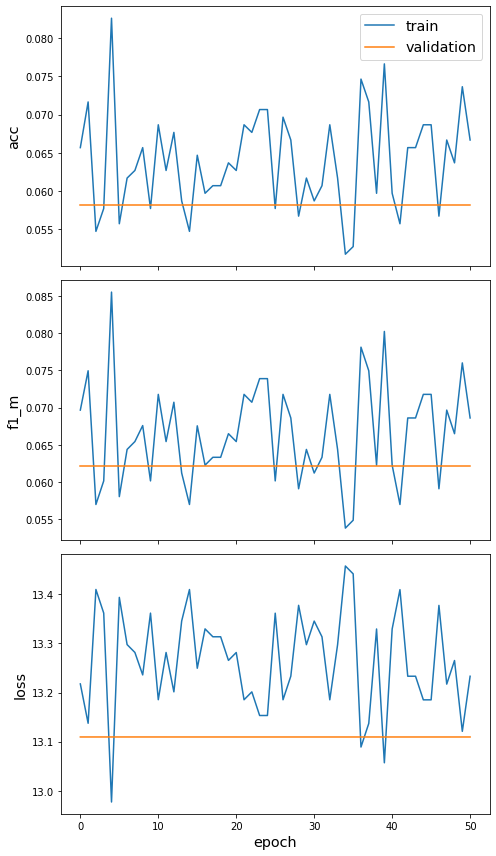

In [48]:
gcn_pipeline(dG_motif_exact, dis_nodes_multi)

Array shapes:
 train = (1005, 11)
 val = (2012, 11)
 test = (2012, 11)
Training...
41/41 [==============================] - 1s 18ms/step - loss: 1.6557 - acc: 0.2808 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

Test Set Metrics:

loss: 1.6557

acc: 0.2808

f1_m: 0.0000

precision_m: 0.0000

recall_m: 0.0000


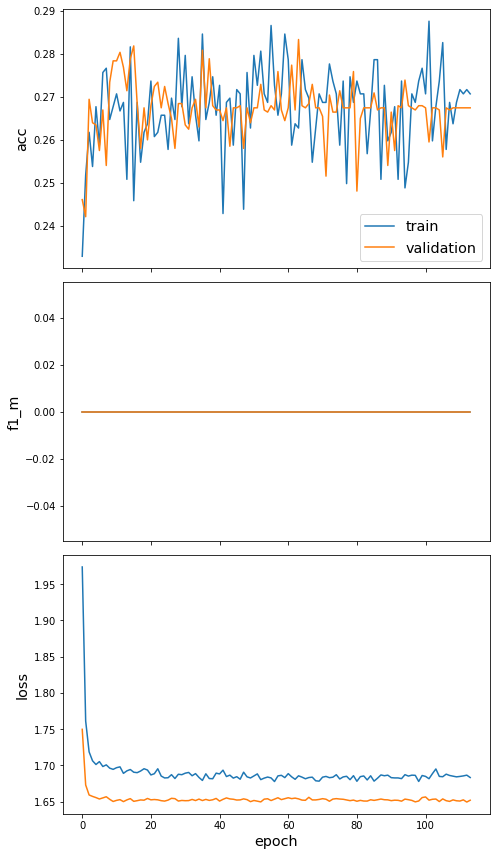

In [49]:
graphsage_pipeline(dG_motif_exact, dis_nodes_multi)